# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list

    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


626


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
print('Beginning Data Retrieval')
print('---------------------------')
counter = 0
for city in cities:
    print(f'Processing Record {counter} of set 1 | {city}')
    counter = counter + 1

Beginning Data Retrieval
---------------------------
Processing Record 0 of set 1 | amderma
Processing Record 1 of set 1 | bubaque
Processing Record 2 of set 1 | chippewa falls
Processing Record 3 of set 1 | lebu
Processing Record 4 of set 1 | lakes entrance
Processing Record 5 of set 1 | atuona
Processing Record 6 of set 1 | moscow
Processing Record 7 of set 1 | east london
Processing Record 8 of set 1 | taolanaro
Processing Record 9 of set 1 | tsihombe
Processing Record 10 of set 1 | hobart
Processing Record 11 of set 1 | talnakh
Processing Record 12 of set 1 | kamenskoye
Processing Record 13 of set 1 | pevek
Processing Record 14 of set 1 | katsina
Processing Record 15 of set 1 | ruatoria
Processing Record 16 of set 1 | khatanga
Processing Record 17 of set 1 | albany
Processing Record 18 of set 1 | bethel
Processing Record 19 of set 1 | gat
Processing Record 20 of set 1 | clyde river
Processing Record 21 of set 1 | meulaboh
Processing Record 22 of set 1 | ahipara
Processing Record 23

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
## Finding * Display the DataFrame

In [14]:
# # Finding for one city
# # Save config information.
# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "imperial"

# # Build partial query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q="
# query_url
# target_city = 'phoenix'

# data = requests.get(query_url + target_city).json()
# print(query_url + target_city)

# data['coord']['lon']
# data['coord']['lat']
# data['main']['temp_max']
# data['main']['humidity']
# data['clouds']['all']
# data['wind']['speed']
# data['main']['temp_max']
# data['dt']
# data['sys']['country']
# data['name']


In [20]:
city1 = []
Lat = []
Long = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date1 = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        city1.append(response['name'])
        Lat.append(response['coord']['lat'])
        Long.append(response['coord']['lon'])
        maxtemp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date1.append(response['dt'])
    except KeyError:
        print(f'Skipped City: {city}')

print(len(city1))
print(len(Lat))
print(len(Long))
print(len(maxtemp))
print(len(humidity))
print(len(cloudiness))
print(len(windspeed))
print(len(country))
print(len(date1))

### Creating a Datafram 
df = pd.DataFrame({'City': city1,
                   'Lat' : Lat,
                   'Lng' : Long,
                   'Max Temp': maxtemp,
                   'Humidity':humidity,
                   'Cloudiness':cloudiness,
                   'Wind Speed': windspeed,
                   'Country' : country,
                   'Date': date1
                  })




Skipped City: amderma
Skipped City: taolanaro
Skipped City: tsihombe
Skipped City: kamenskoye
Skipped City: ruatoria
Skipped City: sentyabrskiy
Skipped City: attawapiskat
Skipped City: belushya guba
Skipped City: galiwinku
Skipped City: nizhniy tagil-39
Skipped City: cam pha
Skipped City: khonuu
Skipped City: alotau
Skipped City: stoyba
Skipped City: illoqqortoormiut
Skipped City: samusu
Skipped City: labutta
Skipped City: kazalinsk
Skipped City: warqla
Skipped City: cumaribo
Skipped City: toliary
Skipped City: stekolnyy
Skipped City: chagda
Skipped City: makung
Skipped City: ust-kamchatsk
Skipped City: grand river south east
Skipped City: uwayl
Skipped City: tasbuget
Skipped City: sahrak
Skipped City: bolungarvik
Skipped City: barentsburg
Skipped City: katha
Skipped City: gulshat
Skipped City: okandja
Skipped City: tabialan
Skipped City: tumannyy
Skipped City: atsiki
Skipped City: formoso do araguaia
Skipped City: palabuhanratu
Skipped City: buqayq
Skipped City: jiddah
Skipped City: n

In [21]:
# Export the city data into a .csv.
# Display the DataFrame

df.to_csv('../output_data/cities_t.csv', index=False)
df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bubaque,11.2833,-15.8333,76.10,73,81,5.93,GW,1618718831
1,Chippewa Falls,44.9369,-91.3929,50.00,40,75,3.44,US,1618718402
2,Lebu,-37.6167,-73.6500,55.24,88,100,7.27,CL,1618718398
3,Lakes Entrance,-37.8811,147.9810,68.00,53,8,3.00,AU,1618718832
4,Atuona,-9.8000,-139.0333,80.74,74,36,18.95,PF,1618718348


In [22]:
# Describe
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.833535,17.445769,58.166028,68.547872,52.622340,7.723635,1.618719e+09
std,34.306860,91.122329,21.093653,22.557356,39.612074,5.264073,2.410726e+02
min,-54.800000,-179.166700,-11.020000,1.000000,0.000000,0.310000,1.618718e+09
25%,-8.905000,-65.269875,42.950000,56.000000,7.000000,3.525000,1.618719e+09
50%,26.433600,21.063350,62.770000,73.000000,58.000000,6.665000,1.618719e+09
75%,50.145425,96.987075,75.000000,87.000000,93.000000,10.360000,1.618719e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,30.060000,1.618719e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
# Since the Max of Humidity is 100, No Humidity greater than 100 So this step Skipped
df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.833535,17.445769,58.166028,68.547872,52.622340,7.723635,1.618719e+09
std,34.306860,91.122329,21.093653,22.557356,39.612074,5.264073,2.410726e+02
min,-54.800000,-179.166700,-11.020000,1.000000,0.000000,0.310000,1.618718e+09
25%,-8.905000,-65.269875,42.950000,56.000000,7.000000,3.525000,1.618719e+09
50%,26.433600,21.063350,62.770000,73.000000,58.000000,6.665000,1.618719e+09
75%,50.145425,96.987075,75.000000,87.000000,93.000000,10.360000,1.618719e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,30.060000,1.618719e+09


In [319]:
#  Get the indices of cities that have humidity over 100%.


In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bubaque,11.2833,-15.8333,76.10,73,81,5.93,GW,1618718831
1,Chippewa Falls,44.9369,-91.3929,50.00,40,75,3.44,US,1618718402
2,Lebu,-37.6167,-73.6500,55.24,88,100,7.27,CL,1618718398
3,Lakes Entrance,-37.8811,147.9810,68.00,53,8,3.00,AU,1618718832
4,Atuona,-9.8000,-139.0333,80.74,74,36,18.95,PF,1618718348
...,...,...,...,...,...,...,...,...,...
559,Misratah,32.3754,15.0925,60.66,77,100,9.60,LY,1618719005
560,Cleveland,41.4995,-81.6954,39.20,81,40,5.75,US,1618718882
561,Nkhotakota,-12.9274,34.2961,69.17,83,79,12.75,MW,1618719005
562,Churapcha,62.0025,132.4325,25.47,64,100,12.91,RU,1618719006


In [29]:
###  Converting the Unix date format to yyyy-mm-dd and then spliting the column to separate date and time
# clean_city_data['Date'] = pd.to_datetime(clean_city_data['Date']).astype(str)
# # clean_city_data
# clean_city_data[['dte', 'Time']] = clean_city_data['Date'].str.split(' ', n=1, expand=True)
# clean_city_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

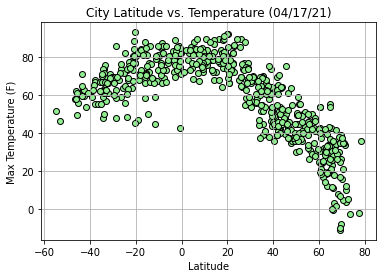

In [25]:
# dte1 = clean_city_data.iloc[0]['dte']
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Temperature (04/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

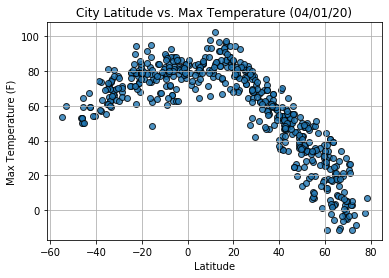

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

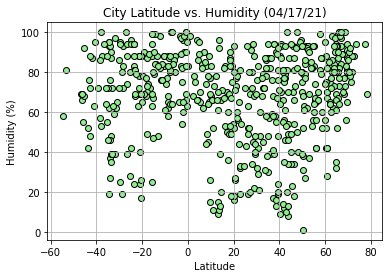

In [26]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Humidity (04/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

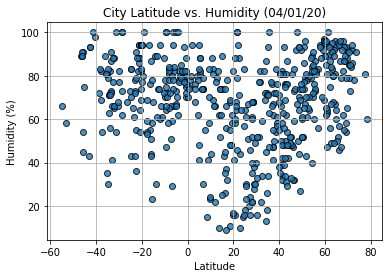

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

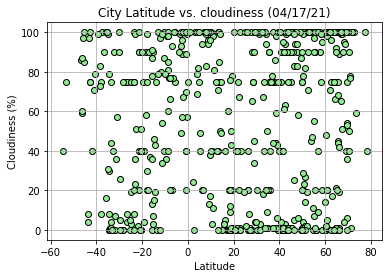

In [27]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. cloudiness (04/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

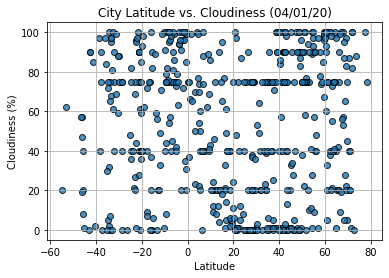

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (%)')

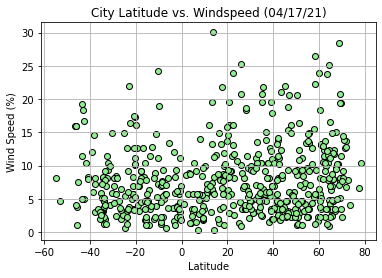

In [28]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color='lightgreen', marker='o', edgecolors='black')
plt.grid()
plt.title(f'City Latitude vs. Windspeed (04/17/21)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

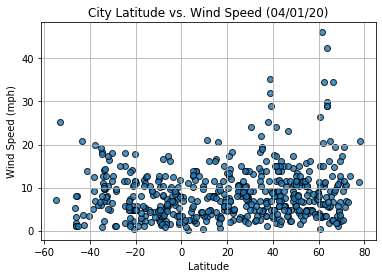

## Linear Regression

In [29]:
city_data_NH = clean_city_data[clean_city_data['Lat'] > 0]
city_data_NH

city_data_SH = clean_city_data[clean_city_data['Lat'] < 0]
city_data_SH

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Lebu,-37.6167,-73.6500,55.24,88,100,7.27,CL,1618718398
3,Lakes Entrance,-37.8811,147.9810,68.00,53,8,3.00,AU,1618718832
4,Atuona,-9.8000,-139.0333,80.74,74,36,18.95,PF,1618718348
6,East London,-33.0153,27.9116,57.20,72,0,6.91,ZA,1618718351
7,Hobart,-42.8794,147.3294,63.00,48,75,18.41,AU,1618718338
...,...,...,...,...,...,...,...,...,...
547,Kerema,-7.9631,145.7785,82.02,81,77,9.28,PG,1618719001
553,Dunedin,-45.8742,170.5036,61.00,55,97,1.01,NZ,1618718787
555,São José da Coroa Grande,-8.8978,-35.1478,76.17,83,85,2.26,BR,1618719003
557,Antofagasta,-23.6500,-70.4000,60.80,88,20,1.14,CL,1618719004


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Max temp and Latitude is -0.8883
The r-squared is: 0.7890078647565479


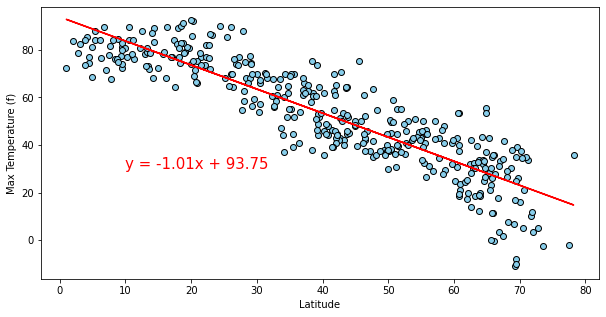

In [30]:

lati_NH = city_data_NH['Lat']
maxtemp_NH = city_data_NH['Max Temp']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, maxtemp_NH)
print(f'The correlation betwwen Northern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, maxtemp_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, maxtemp_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(10,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.46937863826630627


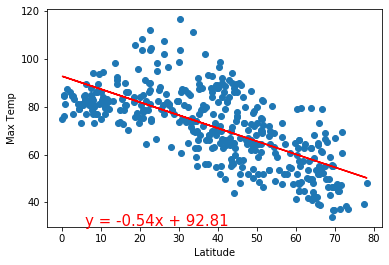

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Max temp and Latitude is 0.5627
The r-squared is: 0.3166160992250741


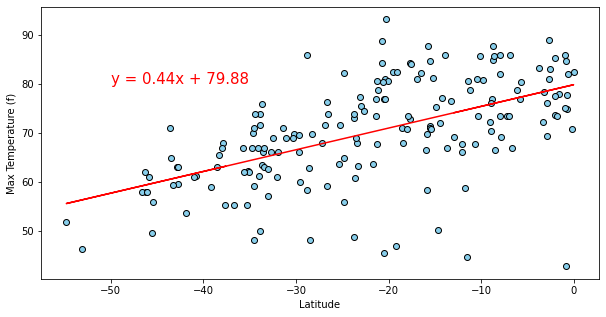

In [31]:
 
lati_SH = city_data_SH['Lat']
maxtemp_SH = city_data_SH['Max Temp']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, maxtemp_SH)
print(f'The correlation betwwen Southern Hemisphere Max temp and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, maxtemp_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, maxtemp_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,80),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.6082708688906918


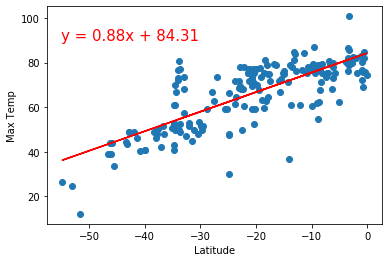

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Humidity and Latitude is 0.2467
The r-squared is: 0.060854991548810376


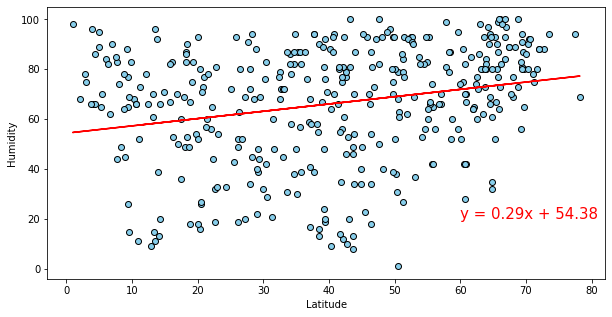

In [32]:

lati_NH = city_data_NH['Lat']
hum_NH = city_data_NH['Humidity']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, hum_NH)
print(f'The correlation betwwen Northern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, hum_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, hum_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(60,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.000543987878808455


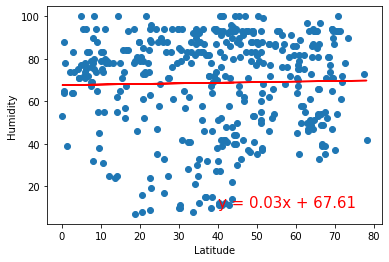

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Humidity and Latitude is 0.2332
The r-squared is: 0.05439733478547653


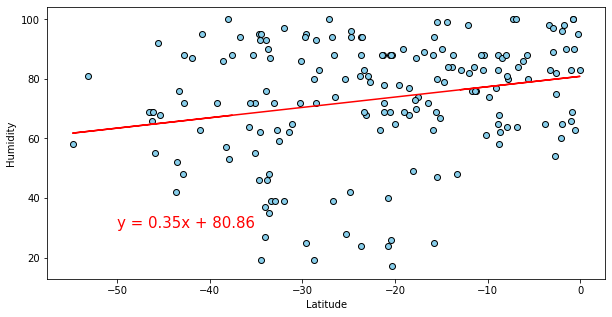

In [33]:
 
lati_SH = city_data_SH['Lat']
hum_SH = city_data_SH['Humidity']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, hum_SH)
print(f'The correlation betwwen Southern Hemisphere Humidity and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, hum_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, hum_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,30),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity ')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.014985174297345524


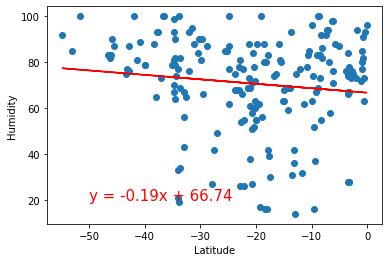

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Cloudiness and Latitude is 0.0917
The r-squared is: 0.008400904980309465


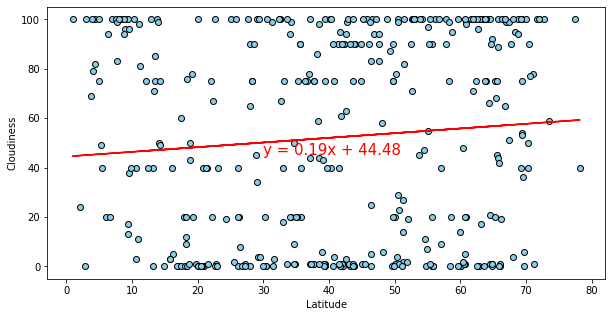

In [34]:

lati_NH = city_data_NH['Lat']
clo_NH = city_data_NH['Cloudiness']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, clo_NH)
print(f'The correlation betwwen Northern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, clo_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, clo_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(30,45),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.0020898727664228514


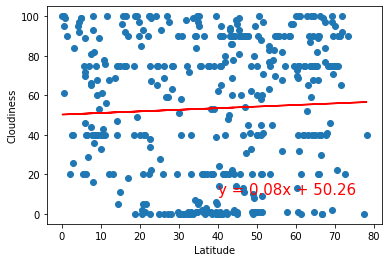

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Cloudiness and Latitude is 0.1904
The r-squared is: 0.036240925058885966


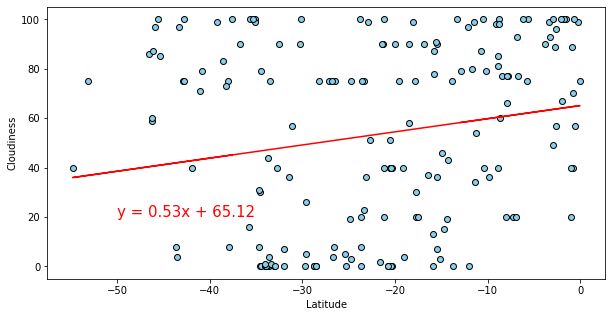

In [35]:
 
lati_SH = city_data_SH['Lat']
clo_SH = city_data_SH['Cloudiness']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, clo_SH)
print(f'The correlation betwwen Southern Hemisphere Cloudiness and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, clo_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, clo_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-50,20),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.0035263772085582894


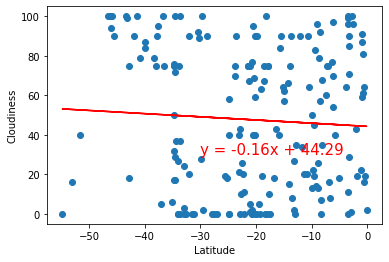

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Northern Hemisphere Wind Speed and Latitude is 0.1054
The r-squared is: 0.011110295844603052


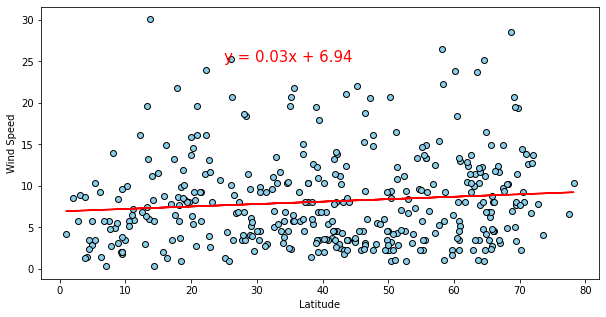

In [36]:

lati_NH = city_data_NH['Lat']
wind_NH = city_data_NH['Wind Speed']

#Calculation of Corelation Coefficient 
correlation = st.pearsonr(lati_NH, wind_NH)
print(f'The correlation betwwen Northern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression 
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_NH, wind_NH)

# Create equation of line 
regress_values = lati_NH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_NH, wind_NH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_NH, regress_values, 'r-')
plt.annotate(line_eq,(25,25),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.04019723576144484


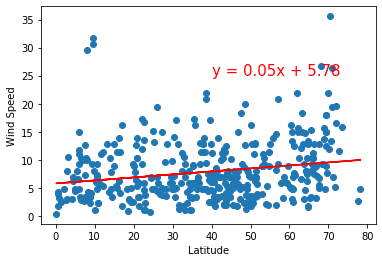

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation betwwen Southern Hemisphere Wind Speed and Latitude is -0.1474
The r-squared is: 0.021725150606793014


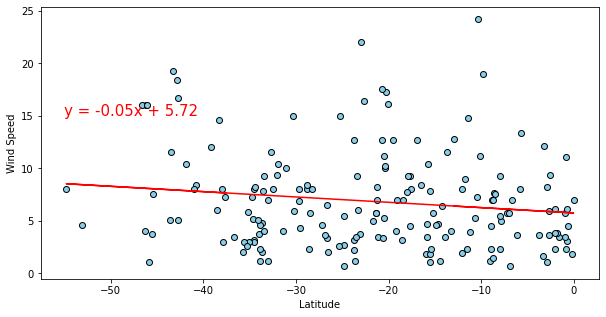

In [37]:

lati_SH = city_data_SH['Lat']
wind_SH = city_data_SH['Wind Speed']

#Calculation of Corelation Coefficient
correlation = st.pearsonr(lati_SH, wind_SH)
print(f'The correlation betwwen Southern Hemisphere Wind Speed and Latitude is {round(correlation[0],4)}')

# Perform a linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(lati_SH, wind_SH)

# Create equation of line 
regress_values = lati_SH * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the graph and regression line
plt.figure(figsize=(10,5))
plt.scatter(lati_SH, wind_SH, color='skyblue', marker='o', edgecolors='black')
plt.plot(lati_SH, regress_values, 'r-')
plt.annotate(line_eq,(-55,15),fontsize=15,color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {rvalue**2}')
plt.show()

The r-value is: 0.017128274759839232


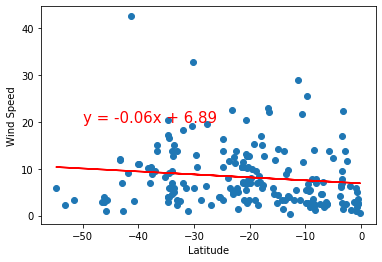